In [131]:
from nba_api.stats.static import players
player_dict =players.get_players()

In [132]:
SCurry = [player for player in player_dict if player['full_name'] == 'Stephen Curry'][0]
SCurry

{'id': 201939,
 'full_name': 'Stephen Curry',
 'first_name': 'Stephen',
 'last_name': 'Curry',
 'is_active': True}

In [133]:
TYoung = [player for player in player_dict if player['full_name'] == 'Trae Young'][0]
TYoung

{'id': 1629027,
 'full_name': 'Trae Young',
 'first_name': 'Trae',
 'last_name': 'Young',
 'is_active': True}

In [172]:
DLillard = [player for player in player_dict if player['full_name'] == 'Kevin Durant'][0]
DLillard

{'id': 201142,
 'full_name': 'Kevin Durant',
 'first_name': 'Kevin',
 'last_name': 'Durant',
 'is_active': True}

In [5]:
from nba_api.stats.endpoints import ShotChartDetail

In [173]:
player_id = '201142' # fill in the player you care about
shot_char_detail_dfs = ShotChartDetail(team_id='0', player_id=player_id, season_nullable='2018-19', context_measure_simple='FGA').get_data_frames()[0]

In [174]:
shot_char_detail_dfs

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021800002,16,201142,Kevin Durant,1610612744,Golden State Warriors,1,10,57,...,Center(C),Less Than 8 ft.,1,-7,17,1,1,20181016,GSW,OKC
1,Shot Chart Detail,0021800002,52,201142,Kevin Durant,1610612744,Golden State Warriors,1,8,22,...,Center(C),Less Than 8 ft.,2,16,21,1,1,20181016,GSW,OKC
2,Shot Chart Detail,0021800002,72,201142,Kevin Durant,1610612744,Golden State Warriors,1,7,4,...,Left Side Center(LC),24+ ft.,25,-180,186,1,0,20181016,GSW,OKC
3,Shot Chart Detail,0021800002,93,201142,Kevin Durant,1610612744,Golden State Warriors,1,5,48,...,Right Side(R),24+ ft.,23,227,52,1,0,20181016,GSW,OKC
4,Shot Chart Detail,0021800002,95,201142,Kevin Durant,1610612744,Golden State Warriors,1,5,43,...,Center(C),8-16 ft.,12,-49,115,1,1,20181016,GSW,OKC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Shot Chart Detail,0021801225,143,201142,Kevin Durant,1610612744,Golden State Warriors,1,2,17,...,Center(C),Less Than 8 ft.,1,15,4,1,0,20190410,MEM,GSW
1379,Shot Chart Detail,0021801225,156,201142,Kevin Durant,1610612744,Golden State Warriors,1,1,22,...,Right Side(R),16-24 ft.,17,172,37,1,1,20190410,MEM,GSW
1380,Shot Chart Detail,0021801225,250,201142,Kevin Durant,1610612744,Golden State Warriors,2,5,8,...,Center(C),Less Than 8 ft.,0,2,6,1,1,20190410,MEM,GSW
1381,Shot Chart Detail,0021801225,253,201142,Kevin Durant,1610612744,Golden State Warriors,2,4,41,...,Right Side(R),16-24 ft.,19,190,17,1,1,20190410,MEM,GSW


In [175]:
shot_char_detail_dfs.SHOT_DISTANCE.unique()

array([ 1,  2, 25, 23, 12, 20,  4, 17, 27, 22, 18, 16, 14,  5, 11,  8, 24,
       10, 13,  9, 19,  6, 26,  7, 28, 15,  0,  3, 35, 29, 30, 31, 37, 21,
       34, 32], dtype=int64)

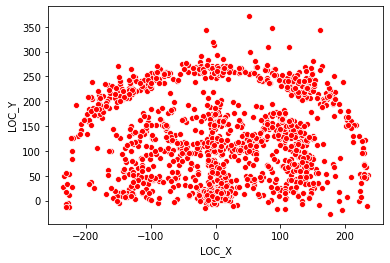

In [176]:
import seaborn as sns
sns.scatterplot(x='LOC_X', y='LOC_Y', data=shot_char_detail_dfs, color='red')

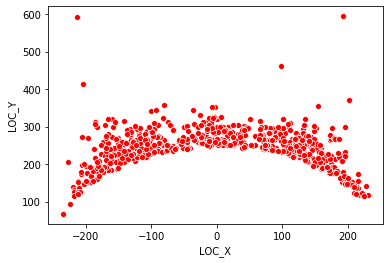

In [163]:
sns.scatterplot(x='LOC_X', y='LOC_Y', data=shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>=24], color='red')

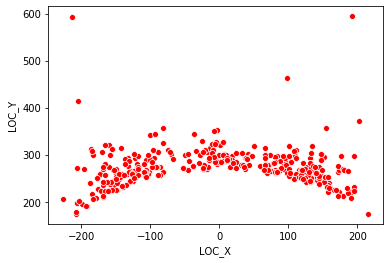

In [164]:
sns.scatterplot(x='LOC_X', y='LOC_Y', data=shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>26], color='red')

In [169]:
shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>=24].shape[0]

646

In [166]:
shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>26]['SHOT_DISTANCE'].mean()

29.632218844984802

In [170]:
shot_char_detail_dfs.loc[(shot_char_detail_dfs['SHOT_DISTANCE']>=24)&(shot_char_detail_dfs['SHOT_MADE_FLAG']==1)].shape[0]

258

In [171]:
shot_char_detail_dfs.loc[(shot_char_detail_dfs['SHOT_DISTANCE']>=24)&(shot_char_detail_dfs['SHOT_MADE_FLAG']==1)].shape[0] / shot_char_detail_dfs.loc[shot_char_detail_dfs['SHOT_DISTANCE']>=24].shape[0]

0.3993808049535604